In [13]:
# Langkah 1: Import Library yang Dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import load_model
import joblib

In [14]:
# Langkah 2: Memuat Model, TfidfVectorizer, dan LabelEncoder
model = load_model('../../app/models/emotion_tracking_model.keras')  # Memuat model
vectorizer = joblib.load('../../app/models/vectorizer.pkl')  # Memuat TfidfVectorizer
label_encoder = joblib.load('../../app/models/label_encoder.pkl')  # Memuat LabelEncoder


d:\Project\SoulBabble\Phase 2\Machine Learning\venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.6.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Project\SoulBabble\Phase 2\Machine Learning\venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.6.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Project\SoulBabble\Phase 2\Machine Learning\venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator Lab

In [15]:
# Langkah 3: Fungsi untuk Prediksi Semua Data
def predict_all(data, vectorizer, model, label_encoder):
    results = []
    for _, row in data.iterrows():
        # Gabungkan Level_Emosi, Tipe_Emosi, dan Sumber_Emosi menjadi satu input
        input_text = f"{row['Level_Emosi']} {row['Tipe_Emosi']} {row['Sumber_Emosi']}"
        
        # Ubah input_text menjadi fitur numerik menggunakan TfidfVectorizer
        input_features = vectorizer.transform([input_text]).toarray()
        
        # Prediksi kelas dengan model
        predicted_class = model.predict(input_features)
        predicted_class_index = np.argmax(predicted_class, axis=1)[0]
        
        # Pemetaan kembali ke label asli
        predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]
        
        # Simpan hasil prediksi
        results.append({
            "Input_Text": input_text,
            "True_Label": row['Pertanyaan_Analisis'],
            "Predicted_Label": predicted_label
        })
    return pd.DataFrame(results)


In [16]:
# Langkah 4: Memuat Data Pelatihan
data = pd.read_csv('../../models//ANN/data_set.csv')


In [17]:
# Langkah 5: Prediksi Hasil dari Data Pelatihan
predicted_results = predict_all(data, vectorizer, model, label_encoder)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

d:\Project\SoulBabble\Phase 2\Machine Learning\venv\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

In [18]:
# Langkah 6: Tambahkan Kolom untuk Evaluasi
predicted_results["Correct"] = predicted_results["True_Label"] == predicted_results["Predicted_Label"]

# Menampilkan Tabel Hasil
from IPython.display import display
display(predicted_results.head())

,Input_Text,True_Label,Predicted_Label,Correct
0,Sangat Buruk Kecewa Sekolah,Apa yang membuat kamu merasa kecewa di Sekolah...,Apa yang membuat kamu merasa kecewa di Sekolah...,True
1,Sangat Buruk Kecewa Keluarga,Apa yang membuat kamu merasa kecewa di Keluarg...,Apa yang membuat kamu merasa kecewa di Keluarg...,True
2,Sangat Buruk Kecewa Teman,Apa yang membuat kamu merasa kecewa di Teman? ...,Apa yang membuat kamu merasa kecewa di Teman? ...,False
3,Sangat Buruk Kecewa Lingkungan,Apa yang membuat kamu merasa kecewa di Lingkun...,Apa yang membuat kamu merasa kecewa di Lingkun...,True
4,Sangat Buruk Kecewa Pekerjaan,Apa yang membuat kamu merasa kecewa di Pekerja...,Apa yang membuat kamu merasa kecewa di Perjala...,False


Akurasi Model: 74.46%


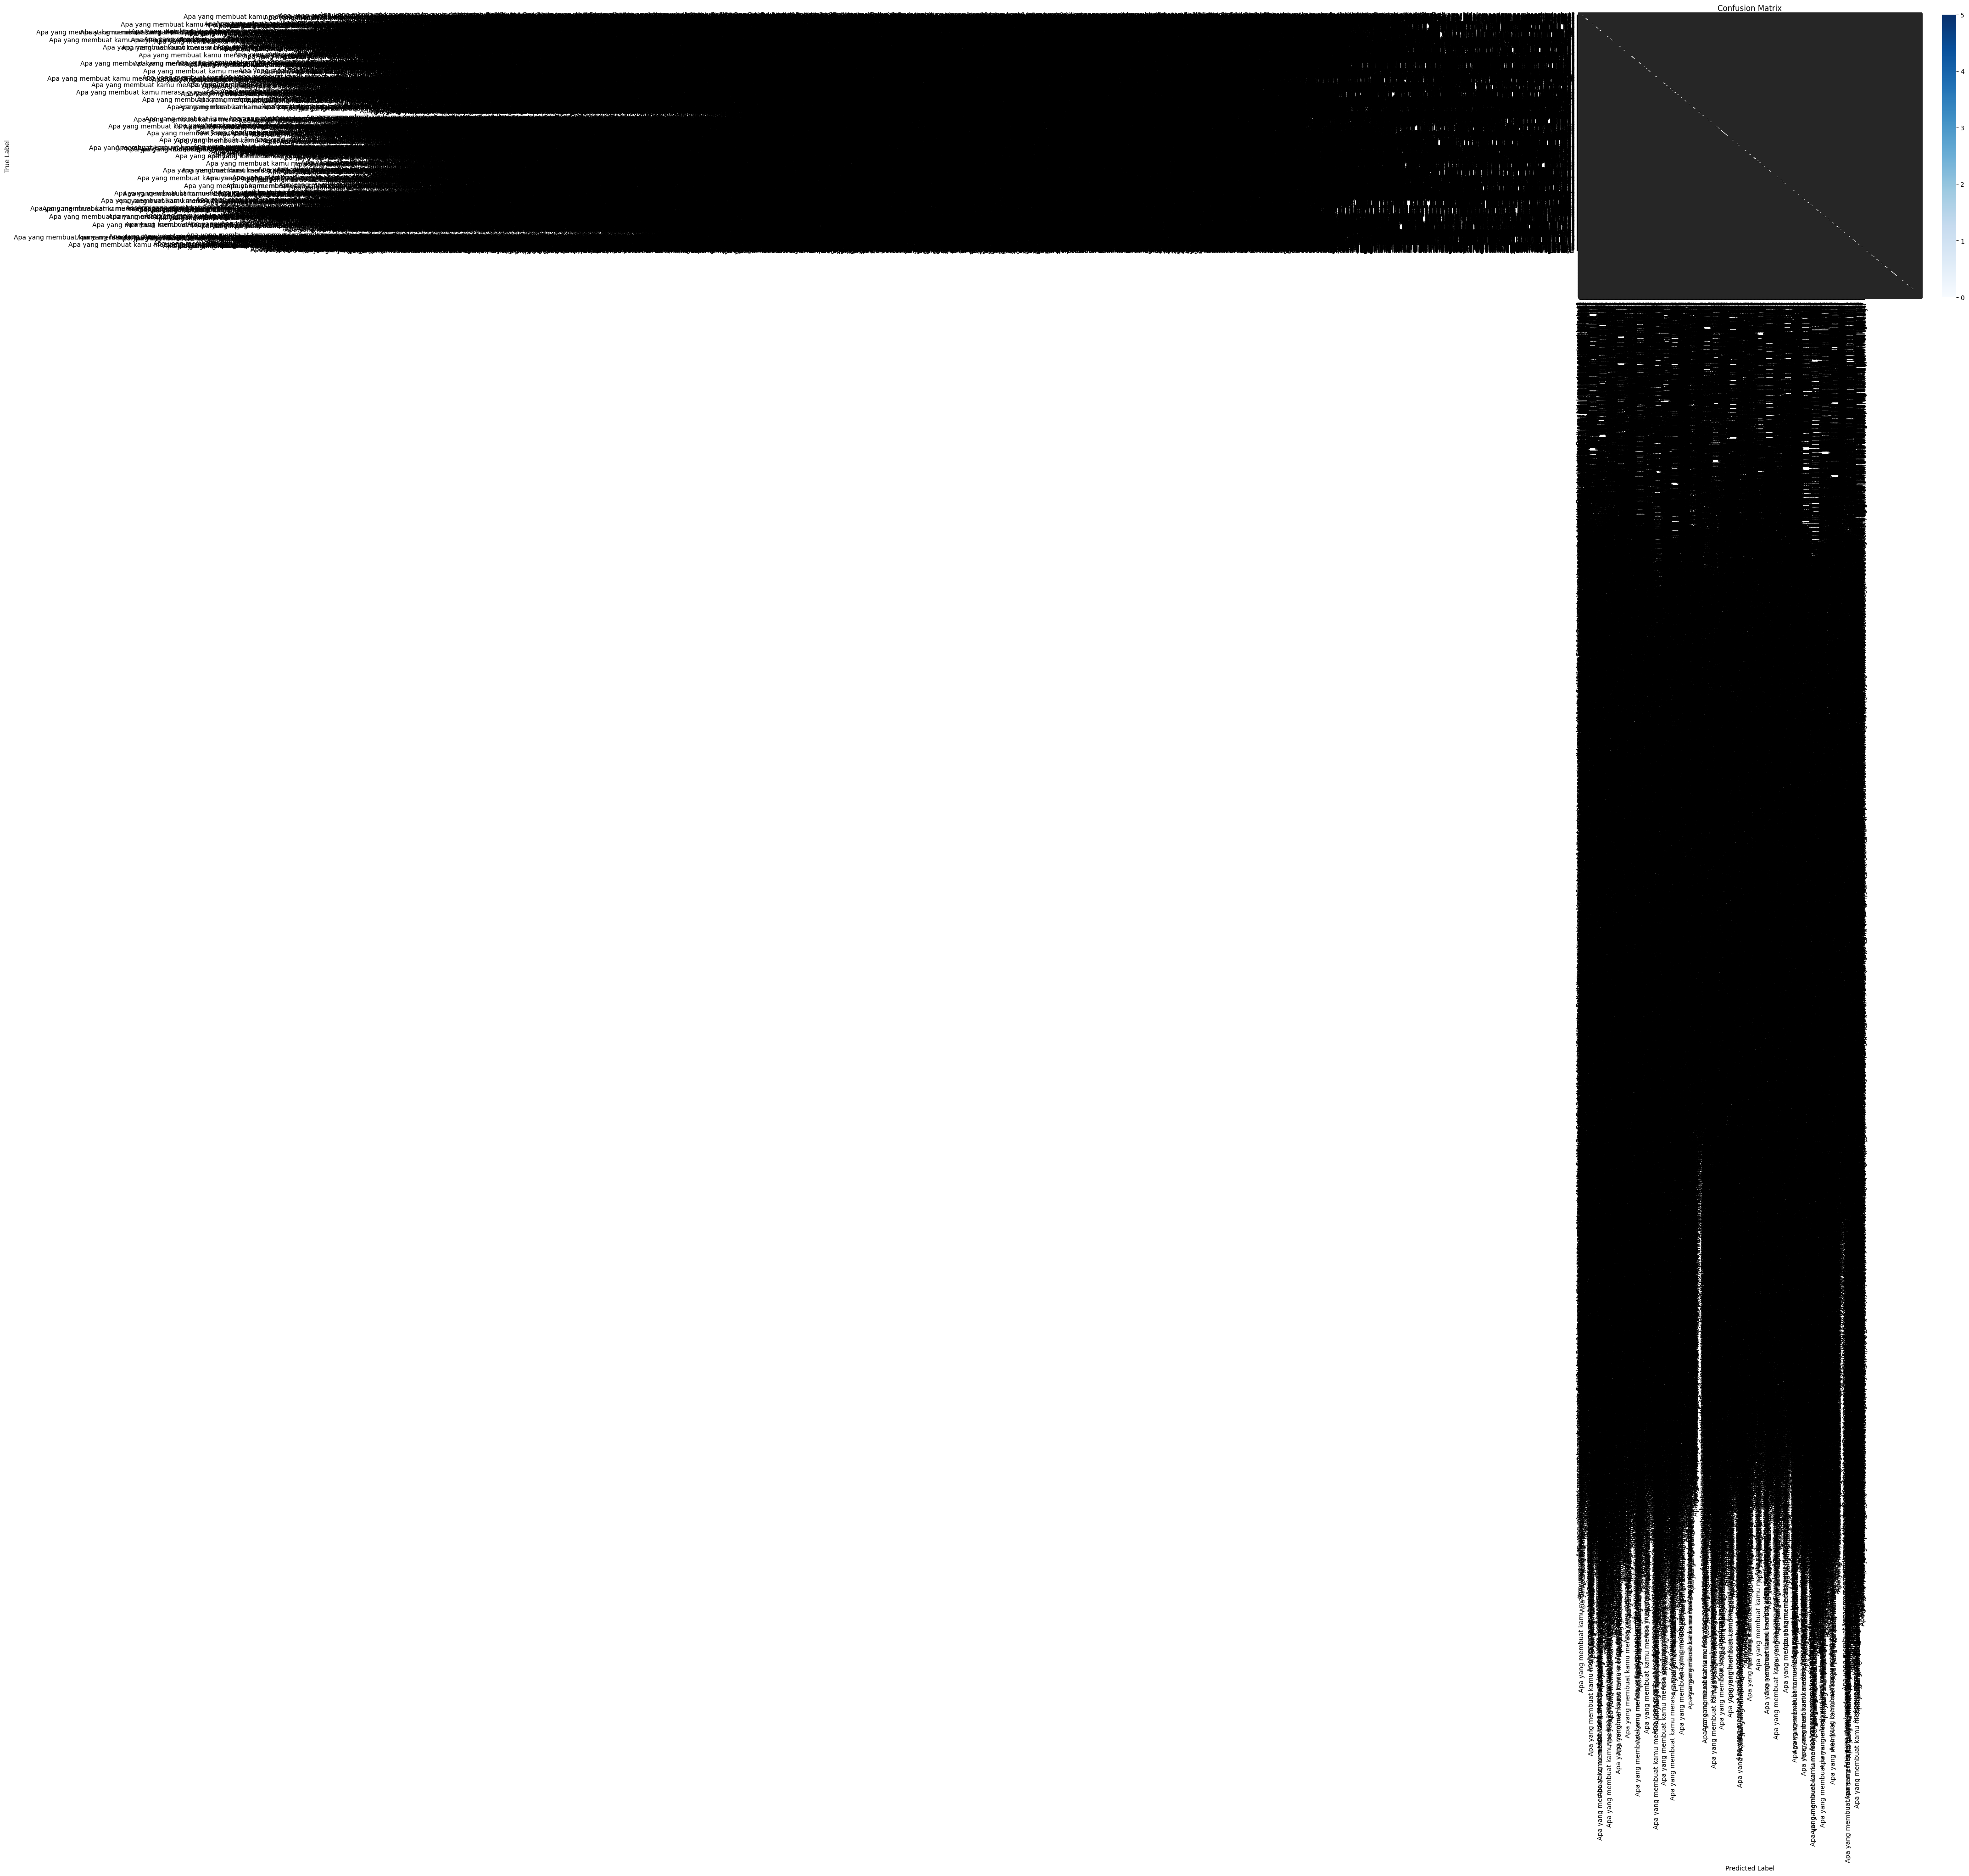

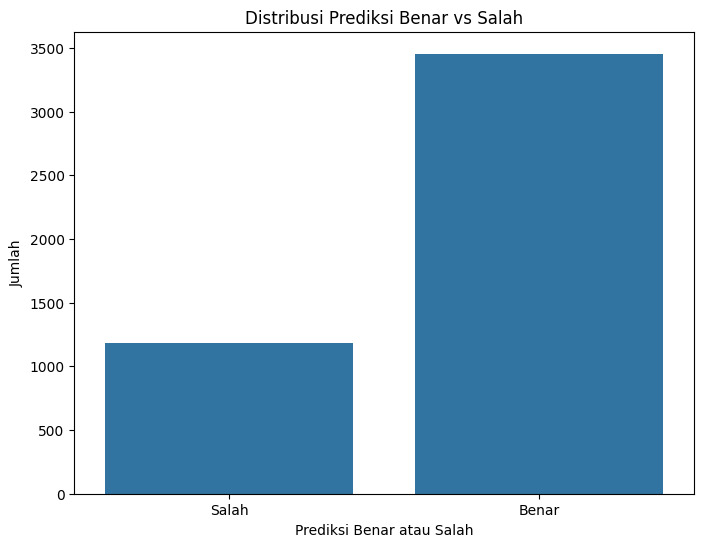

In [19]:
# Langkah 7: Hitung Akurasi dan Buat Grafik
accuracy = accuracy_score(predicted_results["True_Label"], predicted_results["Predicted_Label"])
print(f"Akurasi Model: {accuracy * 100:.2f}%")

# Grafik Confusion Matrix
conf_matrix = confusion_matrix(predicted_results["True_Label"], predicted_results["Predicted_Label"])
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Grafik Distribusi Prediksi Benar vs Salah
plt.figure(figsize=(8, 6))
sns.countplot(data=predicted_results, x="Correct")
plt.title("Distribusi Prediksi Benar vs Salah")
plt.xlabel("Prediksi Benar atau Salah")
plt.ylabel("Jumlah")
plt.xticks([0, 1], ["Salah", "Benar"])
plt.show()


In [20]:
# Langkah 8: Analisis Performa Model
print("Laporan Klasifikasi:\n")
print(classification_report(predicted_results["True_Label"], predicted_results["Predicted_Label"]))

Laporan Klasifikasi:



d:\Project\SoulBabble\Phase 2\Machine Learning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Project\SoulBabble\Phase 2\Machine Learning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                                                                                                                                                                                                                                                                                                                                                                                                                                              precision    recall  f1-score   support

                                                                                            Apa yang membuat kamu merasa aneh di Aktivitas Fisik? | Apa yang bisa menyebabkan perasaan aneh kamu di Aktivitas Fisik? | Bagaimana situasi di Aktivitas Fisik mempengaruhi perasaan kamu yang aneh? | Apa yang mempengaruhi perasaan aneh kamu di Aktivitas Fisik? | Apa yang membuat kamu merasa aneh di Aktivitas Fisik, dan bagaimana kamu bisa menerima perasaan tersebut?       0.50      0.50      0.50      

d:\Project\SoulBabble\Phase 2\Machine Learning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Project\SoulBabble\Phase 2\Machine Learning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Project\SoulBabble\Phase 2\Machine Learning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric